In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

plt.style.use('ggplot')

In [30]:
returns = pd.read_csv('10_days_returns.csv', index_col = 'Date')

returns.head()

,HSBA.UK,BARC.UK,LLOY.UK,RBS.UK,BP.UK,RDSA.UK,RIO.UK,AAL.UK
Date,,,,,,,,
2009-01-20,-0.245792,-0.570689,-0.638392,-0.789787,-0.049165,-0.039889,-0.185980,-0.242904
2009-01-21,-0.194892,-0.626511,-0.648756,-0.752959,-0.086976,-0.089082,-0.127155,-0.189779
2009-01-22,-0.161517,-0.669258,-0.626603,-0.770249,-0.056389,-0.062640,-0.057660,-0.148328
2009-01-23,-0.192959,-0.722670,-0.649604,-0.779998,-0.042250,-0.033841,-0.052290,-0.124745
2009-01-26,-0.154677,-0.465324,-0.509773,-0.716253,-0.014559,-0.006659,0.064955,-0.046174


## Описание данных

Выведим описательные статистики и автокорреляцию по первому лагу.

In [ ]:
autocorrelation = []

for colname in colnames:
    autocorrelation.append(returns[colname].autocorr(lag = 1))

In [37]:
description = returns.describe()
autocorr = pd.DataFrame([autocorrelation], columns = colnames, index=['autocorr'])
description = description.append(autocorr)
description

,HSBA.UK,BARC.UK,LLOY.UK,RBS.UK,BP.UK,RDSA.UK,RIO.UK,AAL.UK
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,0.001548,0.013534,-0.000657,0.004652,0.001007,0.004643,0.014518,0.009401
std,0.064685,0.150058,0.153627,0.147392,0.063216,0.046326,0.084188,0.079307
min,-0.290343,-0.722670,-0.649604,-0.789787,-0.298137,-0.195308,-0.233768,-0.316247
25%,-0.030701,-0.051445,-0.067942,-0.064734,-0.028745,-0.024213,-0.037974,-0.040067
50%,-0.002056,-0.003666,-0.010334,-0.007179,0.005585,0.007588,0.013533,0.009936
75%,0.030232,0.059088,0.051077,0.062105,0.036411,0.034025,0.066666,0.058990
max,0.298901,0.953121,1.040486,0.980523,0.314099,0.195335,0.317943,0.334882
autocorr,0.868376,0.899319,0.886610,0.864620,0.914782,0.887964,0.875743,0.861956


добавить skew и kurtosis?

## Ковариационная и корреляционная матрицы

In [43]:
cov = returns.cov()
cov

,HSBA.UK,BARC.UK,LLOY.UK,RBS.UK,BP.UK,RDSA.UK,RIO.UK,AAL.UK
HSBA.UK,0.004184,0.006472,0.005634,0.005051,0.001592,0.001356,0.002755,0.003063
BARC.UK,0.006472,0.022517,0.017418,0.015994,0.003319,0.002036,0.005914,0.005600
LLOY.UK,0.005634,0.017418,0.023601,0.018010,0.002826,0.001945,0.005175,0.004849
RBS.UK,0.005051,0.015994,0.018010,0.021724,0.002731,0.002138,0.005006,0.004476
BP.UK,0.001592,0.003319,0.002826,0.002731,0.003996,0.001920,0.002492,0.002341
RDSA.UK,0.001356,0.002036,0.001945,0.002138,0.001920,0.002146,0.002436,0.002265
RIO.UK,0.002755,0.005914,0.005175,0.005006,0.002492,0.002436,0.007088,0.004996
AAL.UK,0.003063,0.005600,0.004849,0.004476,0.002341,0.002265,0.004996,0.006290


In [44]:
corr = returns.corr()
corr

,HSBA.UK,BARC.UK,LLOY.UK,RBS.UK,BP.UK,RDSA.UK,RIO.UK,AAL.UK
HSBA.UK,1.000000,0.666787,0.566960,0.529801,0.389250,0.452506,0.505901,0.597099
BARC.UK,0.666787,1.000000,0.755567,0.723143,0.349909,0.292819,0.468141,0.470574
LLOY.UK,0.566960,0.755567,1.000000,0.795380,0.291005,0.273344,0.400146,0.398004
RBS.UK,0.529801,0.723143,0.795380,1.000000,0.293113,0.313189,0.403456,0.382935
BP.UK,0.389250,0.349909,0.291005,0.293113,1.000000,0.655469,0.468159,0.466896
RDSA.UK,0.452506,0.292819,0.273344,0.313189,0.655469,1.000000,0.624564,0.616507
RIO.UK,0.505901,0.468141,0.400146,0.403456,0.468159,0.624564,1.000000,0.748254
AAL.UK,0.597099,0.470574,0.398004,0.382935,0.466896,0.616507,0.748254,1.000000


In [47]:
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.175, 0.175, 0.125, 0.125])

In [55]:
stock_portfolio_return = np.array(returns)@weights

In [56]:
stock_portfolio_return[:5]

array([-0.29366107, -0.29273877, -0.26934122, -0.26996844, -0.18596835])

In [46]:
np.array(cov)

array([[0.00418419, 0.0064722 , 0.0056341 , 0.00505116, 0.0015917 ,
        0.00135599, 0.00275501, 0.00306313],
       [0.0064722 , 0.02251743, 0.017418  , 0.01599398, 0.00331925,
        0.00203557, 0.0059141 , 0.00560017],
       [0.0056341 , 0.017418  , 0.0236011 , 0.01801   , 0.00282613,
        0.00194537, 0.00517532, 0.00484917],
       [0.00505116, 0.01599398, 0.01801   , 0.02172431, 0.00273108,
        0.00213849, 0.00500635, 0.00447622],
       [0.0015917 , 0.00331925, 0.00282613, 0.00273108, 0.00399624,
        0.00191958, 0.00249156, 0.00234077],
       [0.00135599, 0.00203557, 0.00194537, 0.00213849, 0.00191958,
        0.00214612, 0.00243588, 0.00226506],
       [0.00275501, 0.0059141 , 0.00517532, 0.00500635, 0.00249156,
        0.00243588, 0.0070877 , 0.00499592],
       [0.00306313, 0.00560017, 0.00484917, 0.00447622, 0.00234077,
        0.00226506, 0.00499592, 0.00628966]])

In [48]:
weights@np.array(cov)

array([0.00337728, 0.00861654, 0.0085544 , 0.00811544, 0.00268613,
       0.00204666, 0.00425783, 0.00401559])

(array([0.0856813 , 0.14994228, 0.44982684, 2.29197485, 6.49035869,
        4.88383426, 1.15669759, 0.34272521, 0.14994228, 0.04284065]),
 array([-0.29366107, -0.23133179, -0.16900251, -0.10667323, -0.04434395,
         0.01798533,  0.08031461,  0.14264389,  0.20497317,  0.26730245,
         0.32963173]),
 <a list of 10 Patch objects>)

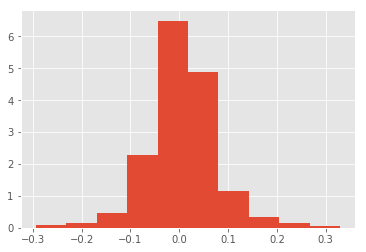

In [61]:
plt.hist(stock_portfolio_return, density = True)

In [63]:
np.mean(stock_portfolio_return)

0.005886307182770796

In [64]:
np.std(stock_portfolio_return)

0.06872020447543399

In [67]:
standnorm_return = np.random.normal(0, np.std(stock_portfolio_return), 10000)

(array([0.01560395, 0.07606924, 0.6826727 , 2.39130495, 4.83137223,
        5.68763885, 3.73519492, 1.63061251, 0.40375214, 0.05071283]),
 array([-0.27220619, -0.22093711, -0.16966803, -0.11839896, -0.06712988,
        -0.0158608 ,  0.03540828,  0.08667736,  0.13794643,  0.18921551,
         0.24048459]),
 <a list of 10 Patch objects>)

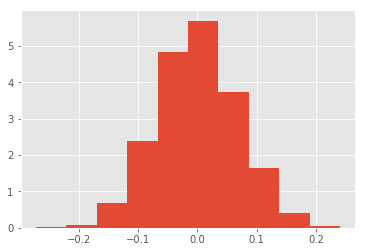

In [68]:
plt.hist(standnorm_return, density = True)